In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
from google.colab import files
fileupload=files.upload()

Saving Churn_Modelling.csv to Churn_Modelling (1).csv


In [ ]:
df=pd.read_csv("Churn_Modelling.csv")

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df=df.drop(columns=['RowNumber','CustomerId','Surname'])

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


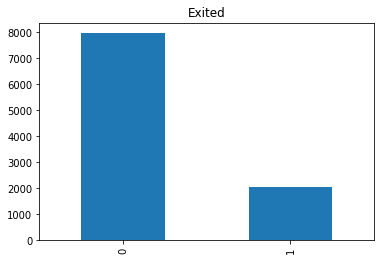

In [ ]:
df['Exited'].value_counts().plot(kind='bar')
plt.title("Exited")
plt.show()

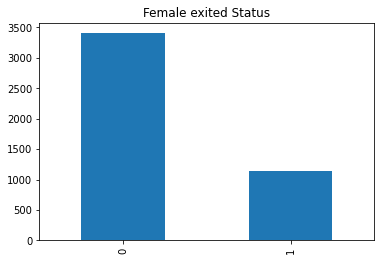

In [ ]:
df[df['Gender']=='Female']['Exited'].value_counts().plot(kind='bar')
plt.title("Female exited Status")
plt.show()

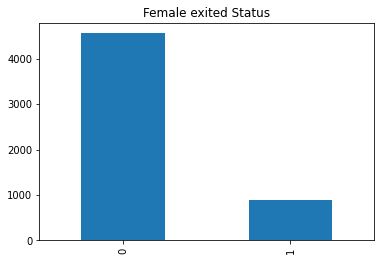

In [ ]:
df[df['Gender']=='Male']['Exited'].value_counts().plot(kind='bar')
plt.title("Female exited Status")
plt.show()

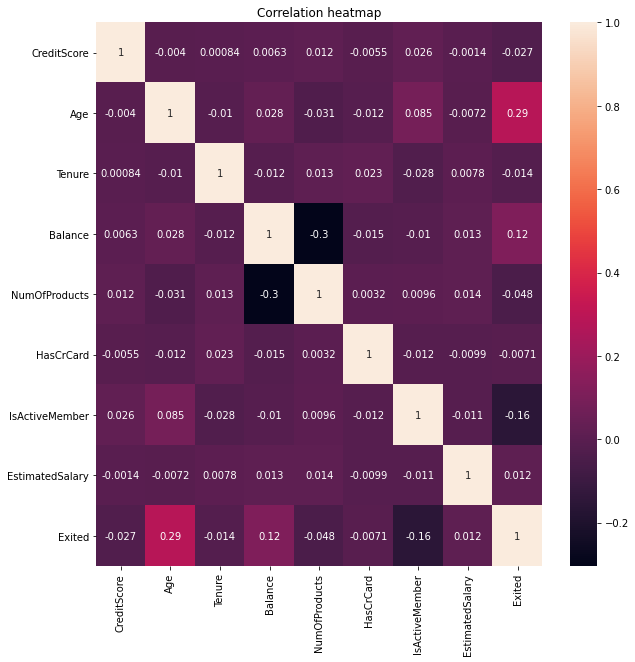

In [ ]:
Var_Corr = df.corr()
plt.figure(figsize=[10,10])
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)
plt.title("Correlation heatmap")
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()

In [ ]:
df_cat=df.select_dtypes('object')
df_num=df.select_dtypes(['float64','int64'])

In [ ]:
for col in df_cat:
    df_cat[col]=le.fit_transform(df_cat[col])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_cat.head()

,Geography,Gender
0,0,0
1,2,0
2,0,0
3,0,0
4,2,0


In [ ]:
df_new=pd.concat([df_num,df_cat],axis=1)

In [ ]:
df_new.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography,Gender
0,619,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,2,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,2,0


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
x=df_new.drop('Exited',axis=1)
y=df_new['Exited']

In [ ]:
ss=StandardScaler()
x=ss.fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0)

In [ ]:
import tensorflow as tf

2 ****LAYERS****

In [ ]:
model=tf.keras.Sequential([
                           tf.keras.layers.Dense(11,activation="relu",input_shape=(x.shape[1],)),
                           tf.keras.layers.Dropout(0.2),
                           tf.keras.layers.Dense(1,activation="sigmoid")
                           
])

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['binary_accuracy'])

In [ ]:
trainedmodel=model.fit(xtrain,ytrain,batch_size=50,epochs=100,validation_split=0.2)

Epoch 1/100
112/112 [==============================] - 1s 3ms/step - loss: 1.2035 - binary_accuracy: 0.3256 - val_loss: 0.8064 - val_binary_accuracy: 0.4793
Epoch 2/100
112/112 [==============================] - 0s 2ms/step - loss: 0.7455 - binary_accuracy: 0.5351 - val_loss: 0.5861 - val_binary_accuracy: 0.7129
Epoch 3/100
112/112 [==============================] - 0s 2ms/step - loss: 0.5899 - binary_accuracy: 0.6933 - val_loss: 0.5024 - val_binary_accuracy: 0.7871
Epoch 4/100
112/112 [==============================] - 0s 2ms/step - loss: 0.5219 - binary_accuracy: 0.7652 - val_loss: 0.4677 - val_binary_accuracy: 0.7929
Epoch 5/100
112/112 [==============================] - 0s 2ms/step - loss: 0.4974 - binary_accuracy: 0.7804 - val_loss: 0.4507 - val_binary_accuracy: 0.8014
Epoch 6/100
112/112 [==============================] - 0s 2ms/step - loss: 0.4714 - binary_accuracy: 0.7942 - val_loss: 0.4411 - val_binary_accuracy: 0.8050
Epoch 7/100
112/112 [==============================] - 0s 

In [ ]:
ypred=model.predict(xtest)
ypred=np.where(ypred>=0.5,1,0)

In [ ]:
ypred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
import matplotlib.pyplot as plt

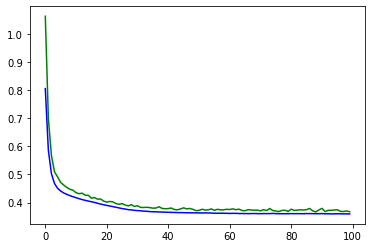

In [ ]:
plt.plot(trainedmodel.history["loss"],'g')
plt.plot(trainedmodel.history["val_loss"],'b')

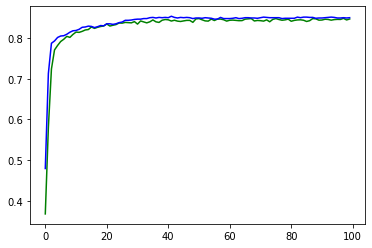

In [ ]:
plt.plot(trainedmodel.history["binary_accuracy"],'g')
plt.plot(trainedmodel.history["val_binary_accuracy"],'b')

In [ ]:
trainedmodel.history

{'binary_accuracy': [0.36767858266830444,
  0.5801785588264465,
  0.7239285707473755,
  0.770714282989502,
  0.7817857265472412,
  0.7914285659790039,
  0.7969642877578735,
  0.804107129573822,
  0.8016071319580078,
  0.8089285492897034,
  0.8146428465843201,
  0.8139285445213318,
  0.816428542137146,
  0.8198214173316956,
  0.820892870426178,
  0.8271428346633911,
  0.8237500190734863,
  0.8264285922050476,
  0.8283928632736206,
  0.8296428322792053,
  0.8346428275108337,
  0.8294642567634583,
  0.831428587436676,
  0.8330357074737549,
  0.8369643092155457,
  0.8366071581840515,
  0.8383928537368774,
  0.8378571271896362,
  0.837321400642395,
  0.8403571248054504,
  0.8342857360839844,
  0.8419643044471741,
  0.8396428823471069,
  0.837321400642395,
  0.839821457862854,
  0.8444643020629883,
  0.839821457862854,
  0.8383928537368774,
  0.84375,
  0.8455356955528259,
  0.8448214530944824,
  0.841785728931427,
  0.84375,
  0.8416071534156799,
  0.8407142758369446,
  0.8421428799629211,


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2379
           1       0.79      0.44      0.57       621

    accuracy                           0.86      3000
   macro avg       0.83      0.70      0.74      3000
weighted avg       0.85      0.86      0.84      3000



## 3 LAYER

In [ ]:
model=tf.keras.Sequential([
                           tf.keras.layers.Dense(11,activation="relu",input_shape=(x.shape[1],)),
                           tf.keras.layers.Dense(7,activation="relu"),
                           tf.keras.layers.Dropout(0.2),
                           tf.keras.layers.Dense(1,activation="sigmoid")
])

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['binary_accuracy'])

In [ ]:
trainedmodel=model.fit(xtrain,ytrain,epochs=100,batch_size=50,validation_split=0.2)

Epoch 1/100
112/112 [==============================] - 1s 6ms/step - loss: 0.6806 - binary_accuracy: 0.6028 - val_loss: 0.5500 - val_binary_accuracy: 0.7921
Epoch 2/100
112/112 [==============================] - 0s 2ms/step - loss: 0.5509 - binary_accuracy: 0.7813 - val_loss: 0.4833 - val_binary_accuracy: 0.8000
Epoch 3/100
112/112 [==============================] - 0s 2ms/step - loss: 0.5001 - binary_accuracy: 0.7924 - val_loss: 0.4575 - val_binary_accuracy: 0.7993
Epoch 4/100
112/112 [==============================] - 0s 2ms/step - loss: 0.4846 - binary_accuracy: 0.7918 - val_loss: 0.4437 - val_binary_accuracy: 0.7993
Epoch 5/100
112/112 [==============================] - 0s 2ms/step - loss: 0.4573 - binary_accuracy: 0.8008 - val_loss: 0.4358 - val_binary_accuracy: 0.8007
Epoch 6/100
112/112 [==============================] - 0s 2ms/step - loss: 0.4539 - binary_accuracy: 0.7944 - val_loss: 0.4286 - val_binary_accuracy: 0.8029
Epoch 7/100
112/112 [==============================] - 0s 

In [ ]:
ypred=model.predict(xtest)
ypred=np.where(ypred>=0.5,1,0)

In [ ]:
ypred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [1]])

In [ ]:
import matplotlib.pyplot as plt

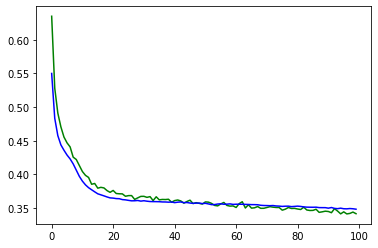

In [ ]:
plt.plot(trainedmodel.history["loss"],'g')
plt.plot(trainedmodel.history["val_loss"],'b')

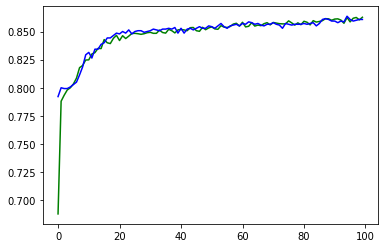

In [ ]:
plt.plot(trainedmodel.history["binary_accuracy"],'g')
plt.plot(trainedmodel.history["val_binary_accuracy"],'b')

In [ ]:
trainedmodel.history

{'binary_accuracy': [0.6878571510314941,
  0.7880356907844543,
  0.7933928370475769,
  0.798035740852356,
  0.800000011920929,
  0.8033928275108337,
  0.808571457862854,
  0.8178571462631226,
  0.8198214173316956,
  0.8246428370475769,
  0.824821412563324,
  0.8299999833106995,
  0.831250011920929,
  0.8349999785423279,
  0.8348214030265808,
  0.8428571224212646,
  0.8399999737739563,
  0.8392857313156128,
  0.8439285755157471,
  0.8466071486473083,
  0.8419643044471741,
  0.8462499976158142,
  0.84375,
  0.8458928465843201,
  0.8482142686843872,
  0.8483928442001343,
  0.8480356931686401,
  0.8475000262260437,
  0.8480356931686401,
  0.8489285707473755,
  0.8492857217788696,
  0.8483928442001343,
  0.8483928442001343,
  0.8512499928474426,
  0.8491071462631226,
  0.8485714197158813,
  0.8519642949104309,
  0.8507142663002014,
  0.8487499952316284,
  0.8514285683631897,
  0.8517857193946838,
  0.8514285683631897,
  0.8507142663002014,
  0.8533928394317627,
  0.8535714149475098,
  0.850

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      2379
           1       0.75      0.46      0.57       621

    accuracy                           0.86      3000
   macro avg       0.81      0.71      0.74      3000
weighted avg       0.85      0.86      0.84      3000

